In [ ]:
import pandas as pd

# Cómo leer datos

Es bastante sencillo cargar datos desde varios formatos de archivo en un DataFrame. En los siguientes ejemplos seguiremos utilizando nuestros datos de manzanas y naranjas, pero esta vez provienen de diversos archivos.

## Leyendo datos desde CSV

Aunque lo vimos en el cuaderno anterior no viene de más recordarlo:

```
df = pd.read_csv('filename.csv')
```

Para el ejemplo podemos usar este csv de prueba [ventas.csv](https://docs.google.com/spreadsheets/d/1HkxNg8tGWe5Oy5FBcTtIxhcrBteb6ziy1wg7ME8wWAg/edit?usp=sharing)

In [ ]:
purchases = pd.read_csv('sample_data/ventas.csv')

purchases

,Unnamed: 0,apples,oranges
0,Julio,3,0
1,Roberto,2,3
2,Lily,0,7
3,David,1,2


Podemos hacer que la columna de nombres sea la que haga de índice en lugar de hacerlo numérico:

In [ ]:
purchases = pd.read_csv('sample_data/ventas.csv', index_col=0)

purchases

,apples,oranges
Julio,3,0
Roberto,2,3
Lily,0,7
David,1,2


## Leyendo datos de JSON

Cuando disponemos de fichero json, esencialmente son datos almacenados de manera similar a los diccionarios Python, luego Pandas puede leerlos de manera sencilla:

```
purchases = pd.read_json('purchases.json')
```

## Leyendo datos de un Base de Datos SQL

Si trabajas con datos de una base de datos SQL, primero necesitas establecer una conexión utilizando una biblioteca de Python apropiada, y luego pasar una consulta a pandas. Aquí utilizaremos SQLite para demostrarlo.

Primero, necesitamos tener instalado pysqlite3, así que ejecuta este comando en tu terminal:

```
pip install pysqlite3
```

sqlite3 se utiliza para crear una conexión con una base de datos que podemos utilizar luego para generar un DataFrame a través de una consulta SELECT.

Así que primero estableceremos una conexión con un archivo de base de datos SQLite:

In [ ]:
import sqlite3

connection = sqlite3.connect('database.db')

### IMPORTANTE:

Si tienes datos en PostgreSQL, MySQL u otro servidor SQL, necesitarás obtener la biblioteca de Python adecuada para realizar una conexión. Por ejemplo, **psycopg2** ([link](http://initd.org/psycopg/download/)) es una biblioteca comúnmente utilizada para establecer conexiones con PostgreSQL. Además, realizarías una conexión a un URI de base de datos en lugar de a un archivo como hicimos aquí con SQLite.

Volviendo al ejemplo anterior podríamos consultar la base de datos para mostrar la información:



In [ ]:
purchases = pd.read_sql_query('SELECT * FROM purchases', connection)

## Convertir resultados a CSV, JSON o SQL

Después de un trabajo exhaustivo de limpieza y tratamiento de tus datos, ahora estás listo para guardarlos en un archivo de tu elección. De manera similar a cómo leemos los datos, pandas proporciona comandos intuitivos para guardarlos:

In [ ]:
purchases.to_csv('results.csv')
purchases.to_json('results.csv')
purchases.to_sql('results.csv', connection) #Este requiere del parámetro de conexión a la base de datos

## Operaciiones más importantes con DataFrames

Los DataFrames poseen cientos de métodos y otras operaciones que son cruciales para cualquier análisis. Como principiante, debes conocer las operaciones que realizan transformaciones simples de tus datos y aquellas que proporcionan un análisis estadístico fundamental.

Carguemos el conjunto de datos de películas de IMDB para comenzar:

In [ ]:
movies = pd.read_csv('sample_data/imdb_movies.csv')

Una de las primeras acciones a realizar es visualizar un pequeño extracto de la información para obtener una referencia visual, para ello usaremos el método **head()**

In [ ]:
movies.head()

,names,date_x,score,genre,overview,crew,orig_title,status,orig_lang,budget_x,revenue,country
0,Creed III,03/02/2023,73.0,"Drama, Action","After dominating the boxing world, Adonis Cree...","Michael B. Jordan, Adonis Creed, Tessa Thompso...",Creed III,Released,English,75000000.0,2.716167e+08,AU
1,Avatar: The Way of Water,12/15/2022,78.0,"Science Fiction, Adventure, Action",Set more than a decade after the events of the...,"Sam Worthington, Jake Sully, Zoe Saldaña, Neyt...",Avatar: The Way of Water,Released,English,460000000.0,2.316795e+09,AU
2,The Super Mario Bros. Movie,04/05/2023,76.0,"Animation, Adventure, Family, Fantasy, Comedy","While working underground to fix a water main,...","Chris Pratt, Mario (voice), Anya Taylor-Joy, P...",The Super Mario Bros. Movie,Released,English,100000000.0,7.244590e+08,AU
3,Mummies,01/05/2023,70.0,"Animation, Comedy, Family, Adventure, Fantasy","Through a series of unfortunate events, three ...","Óscar Barberán, Thut (voice), Ana Esther Albor...",Momias,Released,"Spanish, Castilian",12300000.0,3.420000e+07,AU
4,Supercell,03/17/2023,61.0,Action,Good-hearted teenager William always lived in ...,"Skeet Ulrich, Roy Cameron, Anne Heche, Dr Quin...",Supercell,Released,English,77000000.0,3.409420e+08,US


Podemos usar la columna names como índice de nuestra muestra:

In [ ]:
movies = pd.read_csv('sample_data/imdb_movies.csv', index_col='names')

movies.head()

,date_x,score,genre,overview,crew,orig_title,status,orig_lang,budget_x,revenue,country
names,,,,,,,,,,,
Creed III,03/02/2023,73.0,"Drama, Action","After dominating the boxing world, Adonis Cree...","Michael B. Jordan, Adonis Creed, Tessa Thompso...",Creed III,Released,English,75000000.0,2.716167e+08,AU
Avatar: The Way of Water,12/15/2022,78.0,"Science Fiction, Adventure, Action",Set more than a decade after the events of the...,"Sam Worthington, Jake Sully, Zoe Saldaña, Neyt...",Avatar: The Way of Water,Released,English,460000000.0,2.316795e+09,AU
The Super Mario Bros. Movie,04/05/2023,76.0,"Animation, Adventure, Family, Fantasy, Comedy","While working underground to fix a water main,...","Chris Pratt, Mario (voice), Anya Taylor-Joy, P...",The Super Mario Bros. Movie,Released,English,100000000.0,7.244590e+08,AU
Mummies,01/05/2023,70.0,"Animation, Comedy, Family, Adventure, Fantasy","Through a series of unfortunate events, three ...","Óscar Barberán, Thut (voice), Ana Esther Albor...",Momias,Released,"Spanish, Castilian",12300000.0,3.420000e+07,AU
Supercell,03/17/2023,61.0,Action,Good-hearted teenager William always lived in ...,"Skeet Ulrich, Roy Cameron, Anne Heche, Dr Quin...",Supercell,Released,English,77000000.0,3.409420e+08,US


Como habrás podido comprobar este método devuelve las primeras 5 filas, aunque acepta como parámetro un valor numérico:

In [ ]:
movies.head(10)

,date_x,score,genre,overview,crew,orig_title,status,orig_lang,budget_x,revenue,country
names,,,,,,,,,,,
Creed III,03/02/2023,73.0,"Drama, Action","After dominating the boxing world, Adonis Cree...","Michael B. Jordan, Adonis Creed, Tessa Thompso...",Creed III,Released,English,75000000.0,2.716167e+08,AU
Avatar: The Way of Water,12/15/2022,78.0,"Science Fiction, Adventure, Action",Set more than a decade after the events of the...,"Sam Worthington, Jake Sully, Zoe Saldaña, Neyt...",Avatar: The Way of Water,Released,English,460000000.0,2.316795e+09,AU
The Super Mario Bros. Movie,04/05/2023,76.0,"Animation, Adventure, Family, Fantasy, Comedy","While working underground to fix a water main,...","Chris Pratt, Mario (voice), Anya Taylor-Joy, P...",The Super Mario Bros. Movie,Released,English,100000000.0,7.244590e+08,AU
Mummies,01/05/2023,70.0,"Animation, Comedy, Family, Adventure, Fantasy","Through a series of unfortunate events, three ...","Óscar Barberán, Thut (voice), Ana Esther Albor...",Momias,Released,"Spanish, Castilian",12300000.0,3.420000e+07,AU
Supercell,03/17/2023,61.0,Action,Good-hearted teenager William always lived in ...,"Skeet Ulrich, Roy Cameron, Anne Heche, Dr Quin...",Supercell,Released,English,77000000.0,3.409420e+08,US
Cocaine Bear,02/23/2023,66.0,"Thriller, Comedy, Crime","Inspired by a true story, an oddball group of ...","Keri Russell, Sari, Alden Ehrenreich, Eddie, O...",Cocaine Bear,Released,English,35000000.0,8.000000e+07,AU
John Wick: Chapter 4,03/23/2023,80.0,"Action, Thriller, Crime","With the price on his head ever increasing, Jo...","Keanu Reeves, John Wick, Donnie Yen, Caine, Bi...",John Wick: Chapter 4,Released,English,100000000.0,3.513494e+08,AU
Puss in Boots: The Last Wish,12/26/2022,83.0,"Animation, Family, Fantasy, Adventure, Comedy",Puss in Boots discovers that his passion for a...,"Antonio Banderas, Puss in Boots (voice), Salma...",Puss in Boots: The Last Wish,Released,English,90000000.0,4.834806e+08,AU
Attack on Titan,09/30/2022,59.0,"Action, Science Fiction","As viable water is depleted on Earth, a missio...","Paul Bianchi, Computer (voice), Erin Coker, Al...",Attack on Titan,Released,English,71000000.0,2.549465e+08,US


In [ ]:
#También podemos ver las 2 últimas filas con tail()
movies.tail(2)

,date_x,score,genre,overview,crew,orig_title,status,orig_lang,budget_x,revenue,country
names,,,,,,,,,,,
Darkman II: The Return of Durant,07/11/1995,55.0,"Action, Adventure, Science Fiction, Thriller, ...",Darkman and Durant return and they hate each o...,"Larry Drake, Robert G. Durant, Arnold Vosloo, ...",Darkman II: The Return of Durant,Released,English,116000000.0,475661306.0,US
The Swan Princess: A Royal Wedding,07/20/2020,70.0,"Animation, Family, Fantasy",Princess Odette and Prince Derek are going to ...,"Nina Herzog, Princess Odette (voice), Yuri Low...",The Swan Princess: A Royal Wedding,Released,English,92400000.0,539401838.6,GB


### Obteniendo información

Aplicar el método info() es una de las primeras cosas que debemos realizar después de cargar los datos:

In [ ]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10178 entries, Creed III to The Swan Princess: A Royal Wedding
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date_x      10178 non-null  object 
 1   score       10178 non-null  float64
 2   genre       10093 non-null  object 
 3   overview    10178 non-null  object 
 4   crew        10122 non-null  object 
 5   orig_title  10178 non-null  object 
 6   status      10178 non-null  object 
 7   orig_lang   10178 non-null  object 
 8   budget_x    10178 non-null  float64
 9   revenue     10178 non-null  float64
 10  country     10178 non-null  object 
dtypes: float64(3), object(8)
memory usage: 954.2+ KB


**.info()** proporciona los detalles esenciales sobre tu conjunto de datos, como el número de filas y columnas, la cantidad de valores no nulos, qué tipo de datos hay en cada columna y cuánta memoria está utilizando tu DataFrame.

Ver rápidamente el tipo de dato es realmente bastante útil.

Imagina que acabas de importar algunos JSON y los enteros fueron registrados como cadenas. Vas a hacer alguna aritmética y encuentras una excepción de "operando no soportado" porque no puedes hacer matemáticas con cadenas. Llamar a **.info()** rápidamente señalará que tu columna que pensabas que era de enteros en realidad contiene objetos de tipo cadena.

Otro atributo rápido y útil es **.shape**, que simplemente devuelve una tupla de (filas, columnas):

In [ ]:
movies.shape

(10178, 11)

Esta información nos indica que nuestro DataFrame tiene un total de 10178 filas y 11 columnas.


## Manejo de Duplicados

Actualmente nuestro Dataset importado no tiene datos duplicados, aunque siempre es importante comprobar que no hay agregadas filas duplicadas.

Vamos a realizar una pequeña demostración creando una variable temporal que contenga dos veces la información de nuestro dataset:

In [ ]:
temp_movies = movies.append(movies)

temp_movies.shape

<ipython-input-24-79fc7d8ed0e7>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  temp_movies = movies.append(movies)


(20356, 11)

Como podemos comprobar ahora tenemos el doble de filas que en la comprobación anterior.

Bien, podemos eliminar esos duplicados haciendo uso del método **.drop_duplicates()**

In [ ]:
temp_movies = temp_movies.drop_duplicates()

print(temp_movies.shape)

(10178, 11)


Pero puede resultar un poco engorroso tener que ir creando nuevos dataframes para hacer la limpieza, por esta razón Pandas tiene en muchos de sus métodos la posibilidad de incluir el parámetro **inplace = True** que hará que se apliquen los cambios deseados en el objeto DataFrame

In [ ]:
temp_movies.drop_duplicates(inplace=True)

De este modo los datos se transfomarán de manera auotmática, sin realizar nuevas asignaciones.

Otros parámetros importantes a emplear dentro del método drop_duplicates() es **keep** que nos ofrece tres alternativas:

+ first:(Por defecto) Elimina los duplicados excepto la primera ocurrencia.

* last: Igual pero dejando la última ocurrencia

* False: Elimina todos los duplicados

Observemos que ocurre si usamos esta última opción con el ejemplo anterior:


In [ ]:
temp_movies = movies.append(movies)

temp_movies.drop_duplicates(inplace=True, keep=False)

print(temp_movies.shape)

(0, 11)


<ipython-input-27-9426fd472d88>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  temp_movies = movies.append(movies)


Como todas las filas estaban duplicadas no deja ninguna. Pero, ¿qué tipo de utilidad es esta? La razón principal es que esto te permite localizar todos los duplicados en tu dataset. Cuando veamos las selecciones condicionales, verás cómo hacerlo.

## Limpieza de Columnas

En muchas ocasiones, los datasets contienen una cantidad de columnas cuyos nombres están formados por símbolos, caracteres en mayúsculas y minúsculas, espacios y otros tipos. Para hacer que podamos seleccionar los datos por columna de manera sencilla, es una buena práctica invertir un poco de tiempo limpiando estos nombres de columnas.

Comencemos imprimiendo los nombres de columnas de nuestro dataset:

In [ ]:
print(movies.columns)

Index(['date_x', 'score', 'genre', 'overview', 'crew', 'orig_title', 'status',
       'orig_lang', 'budget_x', 'revenue', 'country'],
      dtype='object')


Esto a parte de ser muy útil para renombrar las columnas lo podemos usar para entender por qué a veces recibimos un mensaje tipo Key Error cuando tratamos de seleccionar una columna.

Con el método **.rename()** podemos renombrar una o varias columnas que le pasamos en forma de diccionario, por ejemplo vamos a renombrar las columnas date_x y overview por estreno y sinopsis respectivamente:

In [ ]:
movies.rename(columns={
    'date_x': 'estreno',
    'overview': 'sinopsis'
}, inplace=True)

print(movies.columns)

Index(['estreno', 'score', 'genre', 'sinopsis', 'crew', 'orig_title', 'status',
       'orig_lang', 'budget_x', 'revenue', 'country'],
      dtype='object')


Excelente!!! Otra manera en caso de tener que andar usando el método rename() es establecer una lista de nombres de columnas directamente como mostramos a continuación:

In [ ]:
movies.columns = ['estreno', 'puntuacion', 'genero', 'sinopsis',
                  'elenco', 'titulo_original', 'estado',
                  'idioma_original', 'presupuesto', 'recaudacion', 'pais']

print(movies.columns)

Index(['estreno', 'puntuacion', 'genero', 'sinopsis', 'elenco',
       'titulo_original', 'estado', 'idioma_original', 'presupuesto',
       'recaudacion', 'pais'],
      dtype='object')


¿¿¿Y si ahora quisiéramos todas las columnas en mayúsculas??? Demasiado trabajo, lo podemos hacer automáticamente así:

In [ ]:
movies.columns = [column.upper() for column in movies]

print(movies.columns)

print(type(movies))

Index(['ESTRENO', 'PUNTUACION', 'GENERO', 'SINOPSIS', 'ELENCO',
       'TITULO_ORIGINAL', 'ESTADO', 'IDIOMA_ORIGINAL', 'PRESUPUESTO',
       'RECAUDACION', 'PAIS'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>


## Cómo trabajar con valores nulos

Cuando exploramos datos, es bastante habitual no encontrar algunos valores o que estos sean nulos debido a que sean celdas en las que esencialmente no hay disponible un valor. Lo más común es que Python nos los muestre como **none** o **np.nan**, cada uno de los cuales se maneja de manera diferente en algunos casos.

Hay 2 opciones en el manejo de estos datos:

+ Deshacernos de las filas o columnas que tienen valores nulos

+ Reemplazar los valores nulos por otros no nulos, a esta técnica se le conoce como **imputación**

Vamos a calcular el número total de valores nulos en cada columna de nuestro dataset. El primer paso será comprobar qué celdas en nuestro DataFrame son nulas:

In [ ]:
movies.isnull()

,ESTRENO,PUNTUACION,GENERO,SINOPSIS,ELENCO,TITULO_ORIGINAL,ESTADO,IDIOMA_ORIGINAL,PRESUPUESTO,RECAUDACION,PAIS
names,,,,,,,,,,,
Creed III,False,False,False,False,False,False,False,False,False,False,False
Avatar: The Way of Water,False,False,False,False,False,False,False,False,False,False,False
The Super Mario Bros. Movie,False,False,False,False,False,False,False,False,False,False,False
Mummies,False,False,False,False,False,False,False,False,False,False,False
Supercell,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
20th Century Women,False,False,False,False,False,False,False,False,False,False,False
Delta Force 2: The Colombian Connection,False,False,False,False,False,False,False,False,False,False,False
The Russia House,False,False,False,False,False,False,False,False,False,False,False


Este método devuelve un Dataframe donde cada celda es respresentada por True o False dependiendo de si contiene un valor nulo o no.

Para contar el número de nulos en cada columna, añadimos la función sum():

In [ ]:
movies.isnull().sum()

ESTRENO             0
PUNTUACION          0
GENERO             85
SINOPSIS            0
ELENCO             56
TITULO_ORIGINAL     0
ESTADO              0
IDIOMA_ORIGINAL     0
PRESUPUESTO         0
RECAUDACION         0
PAIS                0
dtype: int64

De este modo podemos comprobar que nuestra columna GENERO tiene 85 valores nulos y lo mismo ocurre con la columna ELENCO en un total de 56 ocasiones.

Los científicos de datos y analistas se enfrentan regularmente al dilema de eliminar o imputar valores nulos, y es una decisión que requiere un conocimiento profundo de tus datos y su contexto. En general, se sugiere eliminar datos nulos solo si tienes una pequeña cantidad de datos faltantes.

Eliminar nulos es bastante simple:

In [ ]:
#movies.dropna()

Esta operación eliminará cualquier fila con al menos un valor nulo, pero devolverá un nuevo DataFrame sin alterar el original. También podrías especificar inplace=True en este método.

Entonces, en el caso de nuestro dataset, esta operación eliminaría 85 filas donde género es nulo y 56 filas donde elenco es nulo. Esto obviamente parece un desperdicio ya que hay datos perfectamente válidos en las otras columnas de esas filas eliminadas. Es por eso que veremos la imputación a continuación.

Aparte de simplemente eliminar filas, también puedes eliminar columnas con valores nulos estableciendo axis=1:

In [ ]:
#movies.dropna(axis=1)

Esto hará que se eleminen las columnas de elenco y género de nuestro dataset.

### Imputación

La imputación es una técnica convencional de ingeniería utilizada para conservar datos valiosos que tienen valores nulos.

Puede haber casos en los que eliminar cada fila con un valor nulo elimine una parte demasiado grande de tu conjunto de datos, por lo que en su lugar podemos imputar ese nulo con otro valor, generalmente la media o la mediana de esa columna.

Veamos cómo imputar los valores faltantes en la columna elenco. Primero extraeremos esa columna en su propia variable:

In [ ]:
elenco = movies['ELENCO'] #Manera habitual de seleccionar columnas en un DataFrame, del mismo modo que si
# accedemos a los datos de un diccionario - Recuerda como crear datasets desde cero usando diccionarios.

Ahora la variable elenco contiene una serie

In [ ]:
elenco.head()

names
Creed III                      Michael B. Jordan, Adonis Creed, Tessa Thompso...
Avatar: The Way of Water       Sam Worthington, Jake Sully, Zoe Saldaña, Neyt...
The Super Mario Bros. Movie    Chris Pratt, Mario (voice), Anya Taylor-Joy, P...
Mummies                        Óscar Barberán, Thut (voice), Ana Esther Albor...
Supercell                      Skeet Ulrich, Roy Cameron, Anne Heche, Dr Quin...
Name: ELENCO, dtype: object

Como se trata de una columna de texto, no tiene sentido hacer ninguna media, cosa que si sería útil por ejemplo en columnas como presupuesto o recaudación. En este caso lo que vamos a realizar es crear el texto 'Sin Determinar' para rellenar esas celdas:

In [ ]:
elenco.fillna('sin determinar', inplace=True) #Recuerda, inplace modifica directamente el dataset

Si volvemos a comprobar los valores nulos de nuestro Dataset:

In [ ]:
movies.isnull().sum()

ESTRENO             0
PUNTUACION          0
GENERO             85
SINOPSIS            0
ELENCO              0
TITULO_ORIGINAL     0
ESTADO              0
IDIOMA_ORIGINAL     0
PRESUPUESTO         0
RECAUDACION         0
PAIS                0
dtype: int64

Vemos como ELENCO ahora aparece con 0 celdas con valores nulos.

## Comprendiendo las variables
Con el método **describe()** usado en un Dataframe, obtenemos un resumen de la distribución de las variables continuas:

In [ ]:
movies.describe()

,PUNTUACION,PRESUPUESTO,RECAUDACION
count,10178.000000,1.017800e+04,1.017800e+04
mean,63.497052,6.488238e+07,2.531401e+08
std,13.537012,5.707565e+07,2.777880e+08
min,0.000000,1.000000e+00,0.000000e+00
25%,59.000000,1.500000e+07,2.858898e+07
50%,65.000000,5.000000e+07,1.529349e+08
75%,71.000000,1.050000e+08,4.178021e+08
max,100.000000,4.600000e+08,2.923706e+09


Comprender estos números es muy útil a la hora de pensar el tipo de gráfico a usar para su representación visual.

describe() también se puede usar en una variable categórica para obtener el recuento de filas, el recuento único de categorías, las categoría superior y la frecuencia de la categoría superior:

In [ ]:
movies['PAIS'].describe()

count     10178
unique       60
top          AU
freq       4885
Name: PAIS, dtype: object

Este resultado nos informa que la columna país tiene 60 valores únicos, que el que más se repite es AU con una frecuencia de 4885 veces.

Con el método .value_counts() podemos ver la frecuencia de todos los valores en una columna:


In [ ]:
movies['PAIS'].value_counts().head(10) #Incluimos head para mostrar solo los 10 primeros

AU    4885
US    2750
JP     538
KR     361
FR     222
GB     174
ES     153
HK     125
IT     123
MX     105
Name: PAIS, dtype: int64

### Relaciones entre variables contínuas

Utilizando el método de correlación **.corr()** podemos generar la relación entre cada variable continua:

In [ ]:
movies.corr()

<ipython-input-85-0119fb4bb284>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  movies.corr()


,PUNTUACION,PRESUPUESTO,RECAUDACION
PUNTUACION,1.000000,-0.23547,0.096533
PRESUPUESTO,-0.235470,1.00000,0.673830
RECAUDACION,0.096533,0.67383,1.000000


Las tablas de correlación son una representación numérica de las relaciones bivariadas en el conjunto de datos.

Los números positivos indican una correlación positiva — uno sube y el otro también — y los números negativos representan una correlación inversa — uno sube y el otro baja. 1.0 indica una correlación perfecta.

Así que mirando en la primera fila, primera columna vemos que la puntuación tiene una correlación perfecta consigo mismo, lo cual es obvio. Por otro lado, la **correlación entre presupuesto y recaudación es de 0.6**. Un poco más interesante.

Examinar las relaciones bivariadas es útil cuando tienes en mente una variable de resultado o dependiente y te gustaría ver las características más correlacionadas con el aumento o disminución del resultado. Puedes representar visualmente las relaciones bivariadas con diagramas de dispersión (como veremos más adelante).

Para una mirada más profunda a las sumarizaciones de datos, consulta [Esencial Statistics for Data Science](https://www.learndatasci.com/tutorials/data-science-statistics-using-python/).

Ahora veamos más sobre la manipulación de DataFrames.

## Cortar, seleccionar y extraer Dataframes

Hasta ahora nos hemos centrado en algunos resúmenes básicos de nuestros datos. Hemos aprendido sobre la extracción simple de columnas utilizando corchetes individuales y hemos imputado valores nulos en una columna utilizando fillna(). A continuación, están los otros métodos de cortar, seleccionar y extraer que necesitarás usar constantemente.

Es importante indicar que, aunque muchos métodos son los mismos, los DataFrames y las Series tienen diferentes atributos, por lo que necesitarás estar seguro de saber con qué tipo estás trabajando o de lo contrario recibirás errores de atributo.

Veamos primero el trabajo con columnas.

### Trabajo con Columnas

ya lo vimos más arriba, haciendo uso de [ ]:

In [ ]:
generos = movies['GENERO']

type(generos)

pandas.core.series.Series

El comando anterior nos devuelve una Serie. Para extraer una columna como un tipo Dataframe, necesitamos pasar la lista de los nombres de columnas, en nuestro ejemplo una sola:

In [ ]:
generos = movies[['GENERO']]
type(generos)

pandas.core.frame.DataFrame

Como estamos tratando con listas, si necesitamos añadir otra/s columna/s es tan sencillo como hacer esto:

In [ ]:
subconjunto = movies[['GENERO', 'PUNTUACION', 'PRESUPUESTO']]

subconjunto.head()

,GENERO,PUNTUACION,PRESUPUESTO
names,,,
Creed III,"Drama, Action",73.0,75000000.0
Avatar: The Way of Water,"Science Fiction, Adventure, Action",78.0,460000000.0
The Super Mario Bros. Movie,"Animation, Adventure, Family, Fantasy, Comedy",76.0,100000000.0
Mummies,"Animation, Comedy, Family, Adventure, Fantasy",70.0,12300000.0
Supercell,Action,61.0,77000000.0


### Trabajo con Filas

Cuando trabajos con filas tenemos dos opciones:

+ .loc - Localiza por nombre
+ .iloc - Localiza por índice numérico

Recuerda, en nuestro caso que el índice de nuestro dataset es el nombre de la película, por lo que deberemos usar el método .loc y proporcionar el título a encontrar:

In [ ]:
prom = movies.loc['Prometheus']

print(prom)

ESTRENO                                                  06/07/2012 
PUNTUACION                                                      65.0
GENERO                           Science Fiction, Adventure, Mystery
SINOPSIS           A team of explorers discover a clue to the ori...
ELENCO             Noomi Rapace, Dr. Elizabeth Shaw, Michael Fass...
TITULO_ORIGINAL                                           Prometheus
ESTADO                                                      Released
IDIOMA_ORIGINAL                                              English
PRESUPUESTO                                              125000000.0
RECAUDACION                                              402448265.0
PAIS                                                              AU
Name: Prometheus, dtype: object


loc e iloc se pueden considerar similares al extraer de listas en Python. Para demostrar esto aún más, seleccionemos múltiples filas.

¿Cómo lo harías con una lista? En Python, simplemente cortarías con corchetes como en example_list[1:4]. Funciona de la misma manera en pandas:

In [ ]:
subset = movies.loc['Prometheus':'Sing']

subset = movies.iloc[1:6]

subset

,ESTRENO,PUNTUACION,GENERO,SINOPSIS,ELENCO,TITULO_ORIGINAL,ESTADO,IDIOMA_ORIGINAL,PRESUPUESTO,RECAUDACION,PAIS
names,,,,,,,,,,,
Avatar: The Way of Water,12/15/2022,78.0,"Science Fiction, Adventure, Action",Set more than a decade after the events of the...,"Sam Worthington, Jake Sully, Zoe Saldaña, Neyt...",Avatar: The Way of Water,Released,English,460000000.0,2.316795e+09,AU
The Super Mario Bros. Movie,04/05/2023,76.0,"Animation, Adventure, Family, Fantasy, Comedy","While working underground to fix a water main,...","Chris Pratt, Mario (voice), Anya Taylor-Joy, P...",The Super Mario Bros. Movie,Released,English,100000000.0,7.244590e+08,AU
Mummies,01/05/2023,70.0,"Animation, Comedy, Family, Adventure, Fantasy","Through a series of unfortunate events, three ...","Óscar Barberán, Thut (voice), Ana Esther Albor...",Momias,Released,"Spanish, Castilian",12300000.0,3.420000e+07,AU
Supercell,03/17/2023,61.0,Action,Good-hearted teenager William always lived in ...,"Skeet Ulrich, Roy Cameron, Anne Heche, Dr Quin...",Supercell,Released,English,77000000.0,3.409420e+08,US
Cocaine Bear,02/23/2023,66.0,"Thriller, Comedy, Crime","Inspired by a true story, an oddball group of ...","Keri Russell, Sari, Alden Ehrenreich, Eddie, O...",Cocaine Bear,Released,English,35000000.0,8.000000e+07,AU


Una distinción importante entre el uso de .loc y .iloc para seleccionar múltiples filas es que .loc incluye la película Sing en el resultado, pero al usar .iloc estamos obteniendo las filas 1:6 pero la película en el índice 6 no está incluida.

El corte con .iloc sigue las mismas reglas que el corte con listas, el objeto en el índice del final no está incluido.

### Selecciones Condicionales

Hemos revisado cómo seleccionar columnas y filas, pero ¿qué pasa si queremos hacer una selección condicional?

Por ejemplo, ¿qué pasa si queremos filtrar nuestro DataFrame de películas para mostrar solo las películas de estados unidos o películas con una calificación mayor o igual a 80?

Para hacer eso, tomamos una columna del DataFrame y aplicamos una condición booleana a ella. Aquí hay un ejemplo de una condición booleana:

In [ ]:
filter_conditional = (movies['PUNTUACION'] >= 80.0)

filter_conditional.head(20)

names
Creed III                                False
Avatar: The Way of Water                 False
The Super Mario Bros. Movie              False
Mummies                                  False
Supercell                                False
Cocaine Bear                             False
John Wick: Chapter 4                      True
Puss in Boots: The Last Wish              True
Attack on Titan                          False
The Park                                 False
Winnie the Pooh: Blood and Honey         False
The Exorcist                             False
Murder Mystery 2                         False
Black Panther: Wakanda Forever           False
The Pope's Exorcist                      False
Prizefighter: The Life of Jem Belcher    False
Knock at the Cabin                       False
The Devil Conspiracy                     False
Cazadora                                 False
Gold Run                                 False
Name: PUNTUACION, dtype: bool

Similar a isnull(), esto devuelve una Serie de valores Verdaderos y Falsos: Verdadero para las películas cuya puntuación sea superior a 80 y Falso para las que no lo son.

Si queremos filtrar todas las películas con la puntuación deseada, en otras palabras, si no queremos las películas Falsas. Para devolver las filas donde esa condición es Verdadera, tenemos que pasar esta operación al DataFrame:

In [ ]:
print(type(movies))

movies[movies['PUNTUACION'] >= 80.0]

<class 'pandas.core.frame.DataFrame'>


,ESTRENO,PUNTUACION,GENERO,SINOPSIS,ELENCO,TITULO_ORIGINAL,ESTADO,IDIOMA_ORIGINAL,PRESUPUESTO,RECAUDACION,PAIS
names,,,,,,,,,,,
John Wick: Chapter 4,03/23/2023,80.0,"Action, Thriller, Crime","With the price on his head ever increasing, Jo...","Keanu Reeves, John Wick, Donnie Yen, Caine, Bi...",John Wick: Chapter 4,Released,English,100000000.0,3.513494e+08,AU
Puss in Boots: The Last Wish,12/26/2022,83.0,"Animation, Family, Fantasy, Adventure, Comedy",Puss in Boots discovers that his passion for a...,"Antonio Banderas, Puss in Boots (voice), Salma...",Puss in Boots: The Last Wish,Released,English,90000000.0,4.834806e+08,AU
The Whale,02/02/2023,81.0,Drama,A reclusive English teacher suffering from sev...,"Brendan Fraser, Charlie, Sadie Sink, Ellie, Ho...",The Whale,Released,English,3000000.0,3.675201e+07,AU
Demon Slayer -Kimetsu no Yaiba- The Movie: Mugen Train,02/25/2021,83.0,"Animation, Action, Adventure, Fantasy, Thriller","Tanjiro Kamado, joined with Inosuke Hashibira,...","Natsuki Hanae, Tanjiro Kamado (voice), Akari K...",劇場版「鬼滅の刃」無限列車編,Released,Japanese,15800000.0,5.030637e+08,AU
Top Gun: Maverick,05/26/2022,83.0,"Action, Drama",After more than thirty years of service as one...,"Tom Cruise, Capt. Pete 'Maverick' Mitchell, Mi...",Top Gun: Maverick,Released,English,170000000.0,1.481369e+09,AU
...,...,...,...,...,...,...,...,...,...,...,...
Folklore: The Long Pond Studio Sessions,11/25/2020,86.0,"Music, Documentary","An intimate concert film, in which Taylor Swif...","Taylor Swift, Self, Jack Antonoff, Self, Aaron...",Folklore: The Long Pond Studio Sessions,Released,English,221000000.0,1.104642e+09,US
A Brighter Summer Day,07/27/1991,83.0,"Crime, Drama, Romance","A boy experiences first love, friendships and ...","Chang Chen, Xiao Si'r, Lisa Yang, Ming, Chang ...",牯嶺街少年殺人事件,Released,Chinese,186000000.0,5.862587e+08,TW
Simulant,06/02/2023,100.0,"Science Fiction, Thriller",Faye attempts to replace her newly deceased hu...,"Robbie Amell, Evan, Jordana Brewster, Faye, Si...",Hello Stranger,Released,English,201000000.0,1.569324e+09,US


Podemos hacer selecciones más completas haciendo uso de los operadores lógicos => | para or y & para and

Hagamos ahora un filtrado para aquellas películas cuya puntuación sea mayor o igual a 80 y el presupuesto sea menor o igual a 1000000

In [ ]:
movies[(movies['PUNTUACION'] >= 80.0) & (movies['PRESUPUESTO'] <= 1000000)].head()

,ESTRENO,PUNTUACION,GENERO,SINOPSIS,ELENCO,TITULO_ORIGINAL,ESTADO,IDIOMA_ORIGINAL,PRESUPUESTO,RECAUDACION,PAIS
names,,,,,,,,,,,
20th Century Girl,10/06/2022,83.0,"Romance, Drama",Yeon-du asks her best friend Bora to collect a...,"Kim You-jung, Na Bo-ra, Byeon Woo-seok, Poong ...",20세기 소녀,Released,Korean,119.0,77132590.4,KR
Evangelion: 3.0+1.0 Thrice Upon a Time,10/13/2022,83.0,"Animation, Action, Science Fiction, Drama","In the aftermath of the Fourth Impact, strande...","Megumi Ogata, Shinji Ikari (voice), Yuko Miyam...",シン・エヴァンゲリオン劇場版:||,Released,Japanese,961023.8,92300000.0,AU
12 Angry Men,10/10/1957,85.0,Drama,The defense and the prosecution have rested an...,"Martin Balsam, Juror 1, John Fiedler, Juror 2,...",12 Angry Men,Released,English,340000.0,379.0,AU
Miracle in Cell No. 7,10/11/2019,83.0,Drama,"Separated from his daughter, a father with an ...","Aras Bulut İynemli, Memo, Nisa Sofiya Aksongur...",7. Koğuştaki Mucize,Released,Turkish,961023.8,19289062.0,TR
Perfect Blue,06/02/2001,83.0,"Animation, Thriller",A retired pop singer turned actress' sense of ...,"Junko Iwao, Mima Kirigoe (voice), Rica Matsumo...",PERFECT BLUE,Released,Japanese,830000.0,112536.0,AU


Hagamos una más, esta vez algo más completa. Filtraremos todas las películas cuya puntuación esté entre 75 y 90, de género drama y cuyo presupuesto esté entre 100.000 y 700.000

In [ ]:
movies[((movies['PUNTUACION'] >= 75) & (movies['PUNTUACION'] <= 90))
    & (movies['GENERO'] == 'Drama')
    & ((movies['PRESUPUESTO'] >= 100000) & (movies['PRESUPUESTO']<=700000))]

,ESTRENO,PUNTUACION,GENERO,SINOPSIS,ELENCO,TITULO_ORIGINAL,ESTADO,IDIOMA_ORIGINAL,PRESUPUESTO,RECAUDACION,PAIS
names,,,,,,,,,,,
Facing the Giants,09/29/2006,75.0,Drama,A losing coach with an underdog football team ...,"Alex Kendrick, Grant Taylor, Shannen Fields, B...",Facing the Giants,Released,English,100000.0,10243159.0,US
12 Angry Men,10/10/1957,85.0,Drama,The defense and the prosecution have rested an...,"Martin Balsam, Juror 1, John Fiedler, Juror 2,...",12 Angry Men,Released,English,340000.0,379.0,AU
3096 Days,02/27/2013,75.0,Drama,A young Austrian girl is kidnapped and held in...,"Antonia Campbell-Hughes, Natascha Kampusch, Th...",3096 Tage,Released,German,515001.4,6677474.0,AU
Bicycle Thieves,11/03/1950,82.0,Drama,Unemployed Antonio is elated when he finally f...,"Lamberto Maggiorani, Antonio Ricci, Enzo Staio...",Ladri di biciclette,Released,Italian,133000.0,436655.0,AU


Y la última antes de continuar con más cosas, podemos obtener de la consulta anterior aquellas películas cuya recaudación no haya supuesto más del 25% y para ello usaremos el método **quantile()**

In [ ]:
movies[((movies['PUNTUACION'] >= 75) & (movies['PUNTUACION'] <= 90))
    #& (movies['GENERO'] == 'Drama')
    & ((movies['PRESUPUESTO'] >= 100000) & (movies['PRESUPUESTO']<=700000))
    & (movies['RECAUDACION'] < movies['PRESUPUESTO'].quantile(0.25))].head()

,ESTRENO,PUNTUACION,GENERO,SINOPSIS,ELENCO,TITULO_ORIGINAL,ESTADO,IDIOMA_ORIGINAL,PRESUPUESTO,RECAUDACION,PAIS
names,,,,,,,,,,,
Facing the Giants,09/29/2006,75.0,Drama,A losing coach with an underdog football team ...,"Alex Kendrick, Grant Taylor, Shannen Fields, B...",Facing the Giants,Released,English,100000.0,10243159.0,US
12 Angry Men,10/10/1957,85.0,Drama,The defense and the prosecution have rested an...,"Martin Balsam, Juror 1, John Fiedler, Juror 2,...",12 Angry Men,Released,English,340000.0,379.0,AU
A Fistful of Dollars,04/29/2010,79.0,Western,The Man With No Name enters the Mexican villag...,"Clint Eastwood, Joe, Marianne Koch, Marisol, G...",Per un pugno di dollari,Released,Italian,200000.0,14500000.0,AU
In the Mood for Love,03/29/2001,81.0,"Drama, Romance",Two neighbors become intimate after discoverin...,"Tony Leung Chiu-wai, Chow Mo-Wan, Maggie Cheun...",花樣年華,Released,Cantonese,150000.0,12854953.0,AU
3096 Days,02/27/2013,75.0,Drama,A young Austrian girl is kidnapped and held in...,"Antonia Campbell-Hughes, Natascha Kampusch, Th...",3096 Tage,Released,German,515001.4,6677474.0,AU


## Usando Funciones

Es posible iterar sobre un DataFrame o Serie como lo harías con una lista, pero hacerlo —especialmente en conjuntos de datos grandes— es muy lento.

Una alternativa eficiente es aplicar() una función al conjunto de datos. Por ejemplo, podríamos usar una función para convertir películas con una calificación de 75 o superior a un valor de cadena "buena" y el resto a "mala" y usar estos valores transformados para crear una nueva columna.

Primero crearíamos una función que, al recibir una calificación, determine si es buena o mala:

In [ ]:
def rating_movie(x: float):
  if x >= 75.0:
    return 'Buena'
  else:
    return 'Mala'

Ahora queremos enviar toda la columna de calificaciones a través de esta función, que es lo que hace apply():

In [ ]:
movies['CLASIFICADA'] = movies['PUNTUACION'].apply(rating_movie)

movies.head(2)

,ESTRENO,PUNTUACION,GENERO,SINOPSIS,ELENCO,TITULO_ORIGINAL,ESTADO,IDIOMA_ORIGINAL,PRESUPUESTO,RECAUDACION,PAIS,CLASIFICADA
names,,,,,,,,,,,,
Creed III,03/02/2023,73.0,"Drama, Action","After dominating the boxing world, Adonis Cree...","Michael B. Jordan, Adonis Creed, Tessa Thompso...",Creed III,Released,English,75000000.0,2.716167e+08,AU,Mala
Avatar: The Way of Water,12/15/2022,78.0,"Science Fiction, Adventure, Action",Set more than a decade after the events of the...,"Sam Worthington, Jake Sully, Zoe Saldaña, Neyt...",Avatar: The Way of Water,Released,English,460000000.0,2.316795e+09,AU,Buena


El método **.apply()** pasa cada valor en la columna de calificaciones a través de la rating_movie y luego devuelve una nueva Serie. Esta Serie se asigna entonces a una nueva columna llamada CLASIFICADA.

También puedes usar funciones anónimas. Esta función lambda logra el mismo resultado que rating_movie:







In [ ]:
movies['CLAMBDA'] = movies['PUNTUACION'].apply(lambda x: 'Buena' if x >= 75 else 'Mala')

movies.head(3)

,ESTRENO,PUNTUACION,GENERO,SINOPSIS,ELENCO,TITULO_ORIGINAL,ESTADO,IDIOMA_ORIGINAL,PRESUPUESTO,RECAUDACION,PAIS,CLASIFICADA,CLAMBDA
names,,,,,,,,,,,,,
Creed III,03/02/2023,73.0,"Drama, Action","After dominating the boxing world, Adonis Cree...","Michael B. Jordan, Adonis Creed, Tessa Thompso...",Creed III,Released,English,75000000.0,2.716167e+08,AU,Mala,Mala
Avatar: The Way of Water,12/15/2022,78.0,"Science Fiction, Adventure, Action",Set more than a decade after the events of the...,"Sam Worthington, Jake Sully, Zoe Saldaña, Neyt...",Avatar: The Way of Water,Released,English,460000000.0,2.316795e+09,AU,Buena,Buena
The Super Mario Bros. Movie,04/05/2023,76.0,"Animation, Adventure, Family, Fantasy, Comedy","While working underground to fix a water main,...","Chris Pratt, Mario (voice), Anya Taylor-Joy, P...",The Super Mario Bros. Movie,Released,English,100000000.0,7.244590e+08,AU,Buena,Buena


En general, usar apply() será mucho más rápido que iterar manualmente sobre las filas porque pandas está utilizando vectorización.

```
Vectorización: un estilo de programación en computadoras donde las operaciones se aplican a arreglos enteros en lugar de a elementos individuales —Wikipedia
```

Un buen ejemplo de la utilidad de apply() es durante el trabajo de procesamiento de lenguaje natural (NLP). Necesitarás aplicar todo tipo de funciones de limpieza de texto a cadenas para prepararlas para el aprendizaje automático.

# Representación Gráfica

Otra gran ventaja de pandas es que se integra con Matplotlib, por lo que tienes la capacidad de trazar gráficos directamente desde DataFrames y Series. Para comenzar necesitamos importar Matplotlib

```
pip install matplotlib
```

In [ ]:
import matplotlib.pyplot as plt

# Configurando tamaño de fuente y del gráfico
plt.rcParams.update({'font.size': 20, 'figure.figsize': (10,8)})

Ahora podemos comenzar. No habrá mucha variedad sobre la creación de gráficos, pero debería ser suficiente para explorar nuestros datos fácilmente.

Vamos a trazar la relación entre las calificaciones y los ingresos. Todo lo que necesitamos hacer es llamar a .plot() en movies con información sobre cómo construir el gráfico:

<Axes: title={'center': 'Recaudación frente a Puntuación'}, xlabel='PUNTUACION', ylabel='RECAUDACION'>

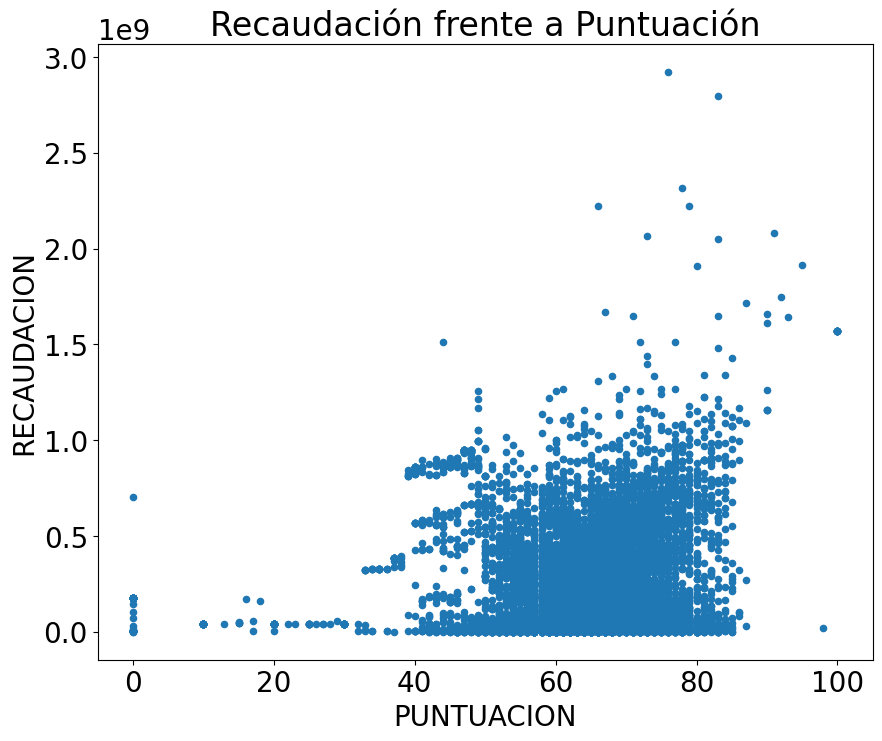

In [ ]:
movies.plot(kind='scatter', x='PUNTUACION', y='RECAUDACION', title='Recaudación frente a Puntuación')

También podemos dibujar un histograma basado en una sóla columna:

<Axes: title={'center': 'Puntuación'}, ylabel='Frequency'>

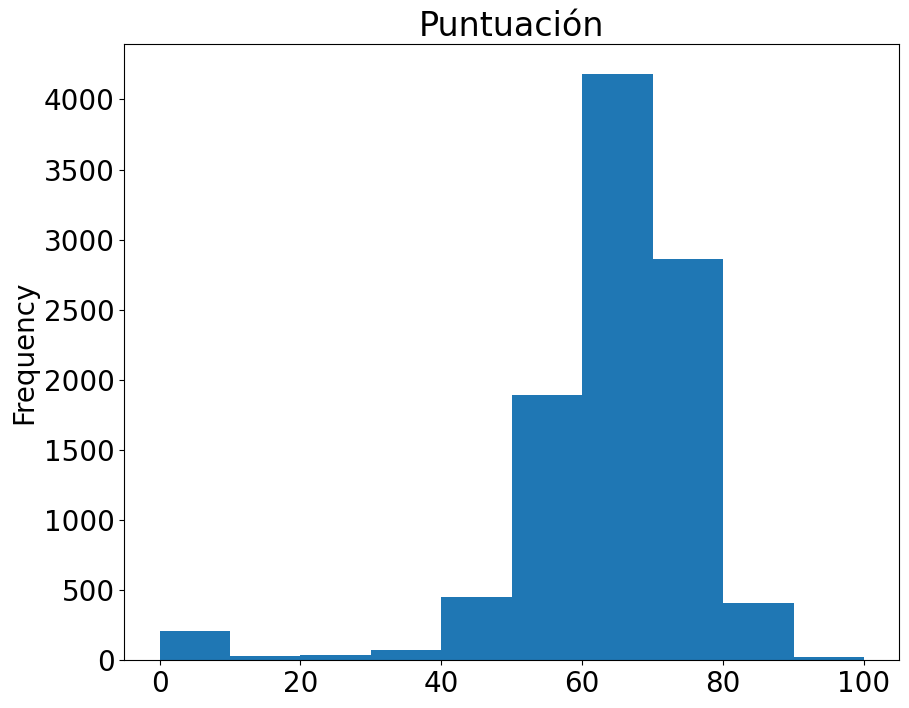

In [ ]:
movies['PUNTUACION'].plot(kind='hist', title='Puntuación')

También podemos representar el método describe con una gráfica de tipo box:

In [ ]:
movies['RECAUDACION'].describe()

count    1.017800e+04
mean     2.531401e+08
std      2.777880e+08
min      0.000000e+00
25%      2.858898e+07
50%      1.529349e+08
75%      4.178021e+08
max      2.923706e+09
Name: RECAUDACION, dtype: float64

<Axes: >

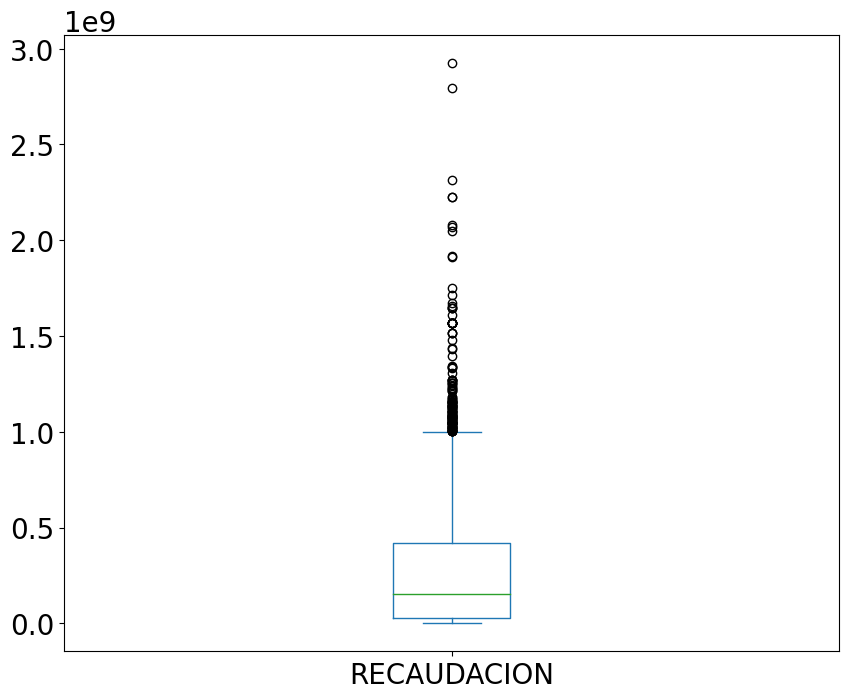

In [ ]:
movies['RECAUDACION'].plot(kind='box')

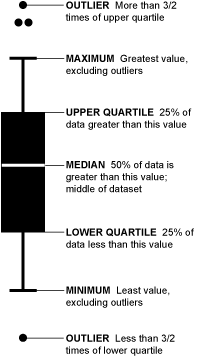

Combinando datos categóricos y continuos, podemos crear un Boxplot de los ingresos que se agrupe por la Categoría de Calificación que creamos anteriormente:

<Axes: title={'center': 'RECAUDACION'}, xlabel='CLASIFICADA'>

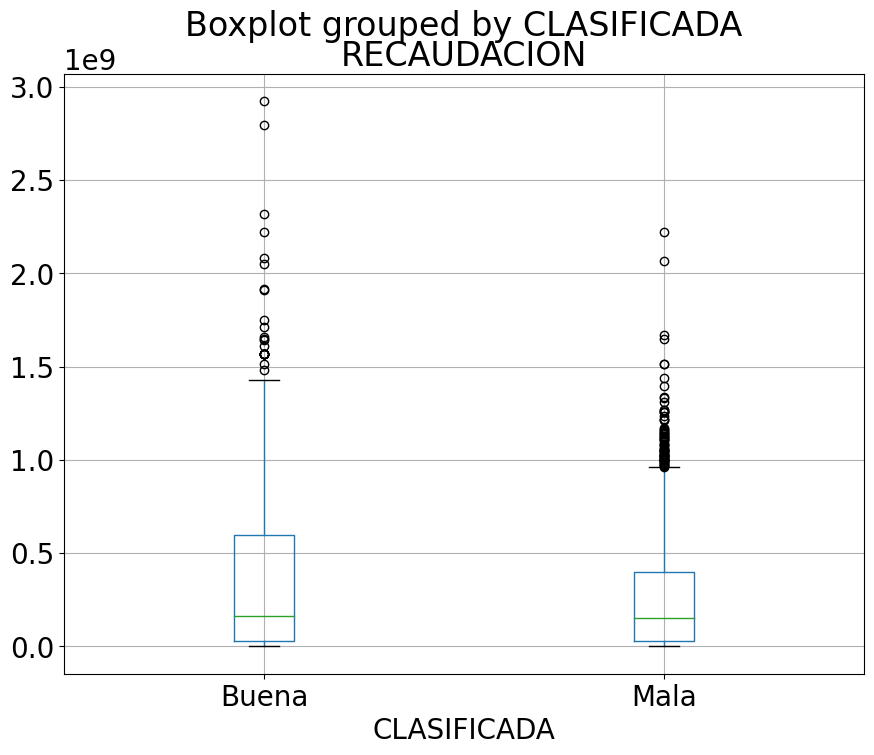

In [ ]:
movies.boxplot(column='RECAUDACION', by='CLASIFICADA')

De manera general, esta es la forma de trazar gráficos con pandas. Hay más gráficos para mencionar, se recomienda echar un vistazo a la  [documentación de plot()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html) para más información sobre lo que puedes hacer.